In [1]:
import sys
import os
sys.path.append(os.getcwd() + '/src')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data.load import load_dataset
from data.process import process_text

data = load_dataset()
df = pd.concat([data['train'], data['valid']], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229618 entries, 0 to 1229617
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   uid            1229618 non-null  object        
 1   time           1229618 non-null  datetime64[ns]
 2   forward_count  1229618 non-null  int64         
 3   comment_count  1229618 non-null  int64         
 4   like_count     1229618 non-null  int64         
 5   content        1229618 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 56.3+ MB


## 1-互动数量分布

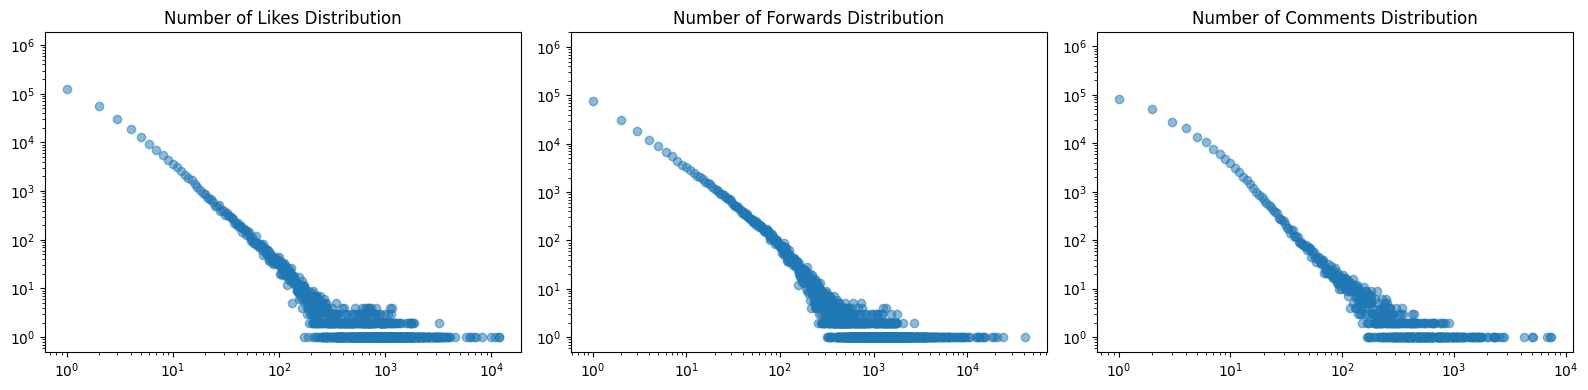

In [3]:
like_count       = df['like_count'].value_counts()
forward_count = df['forward_count'].value_counts()
comment_count = df['comment_count'].value_counts()

fig, axs = plt.subplots(1, 3, figsize=(16, 4))
# plt.scatter(like_count.index, like_count.values, color='skyblue')

axs[0].scatter(like_count.index, like_count.values, alpha=0.5)
axs[0].set_title('Number of Likes Distribution')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

axs[1].scatter(forward_count.index, forward_count.values, alpha=0.5)
axs[1].set_title('Number of Forwards Distribution')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

axs[2].scatter(comment_count.index, comment_count.values, alpha=0.5)
axs[2].set_title('Number of Comments Distribution')
axs[2].set_xscale('log')
axs[2].set_yscale('log')

plt.tight_layout()
# plt.title('Distribution of Likes/Forwards/Comments')
plt.show()

In [11]:
like_cum_sum = like_count.sort_index().cumsum()
forward_cum_sum = forward_count.sort_index().cumsum()
comment_cum_sum = comment_count.sort_index().cumsum()

## 2-用户互动

## 3-时间分析

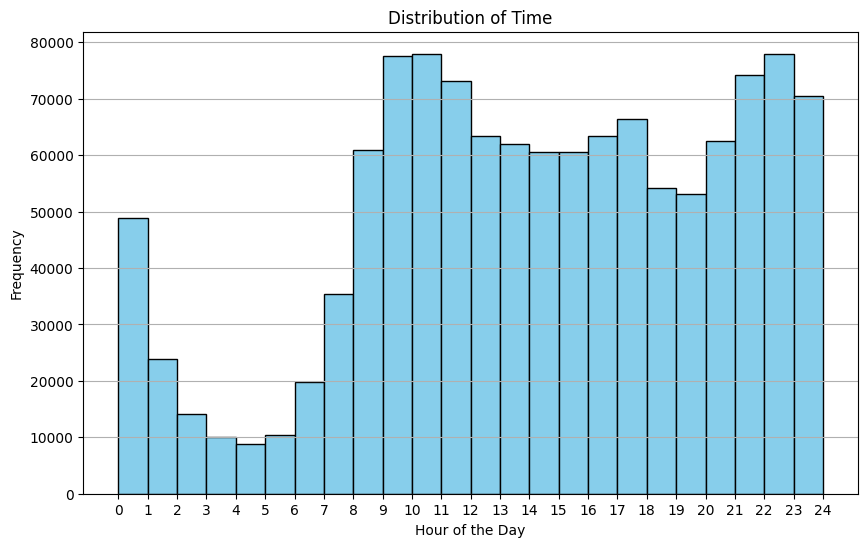

In [4]:
hours = df['time'].dt.hour
plt.figure(figsize=(10, 6))
plt.hist(hours, bins=[i for i in range(25)], color='skyblue', edgecolor='black')
# plt.bar(hours.value_counts().index, hours.value_counts().values)

# Set labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Time')
plt.grid(True, axis='y')

plt.xticks(range(0, 25))
plt.show()

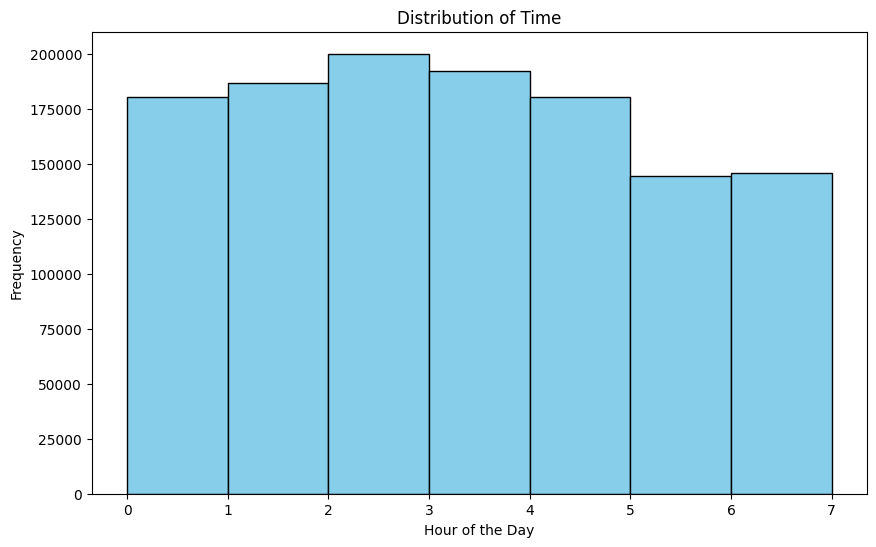

In [21]:
dw = df['time'].dt.day_of_week
plt.figure(figsize=(10, 6))
plt.hist(dw, bins=[i for i in range(8)], color='skyblue', edgecolor='black')
# plt.bar(hours.value_counts().index, hours.value_counts().values)

# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Distribution of Time')

plt.xticks(range(0, 8))
plt.show()

## 4-文本内容分析

[62 81 29 ... 89 78 19]
60.406101732407954 43.68366235986888


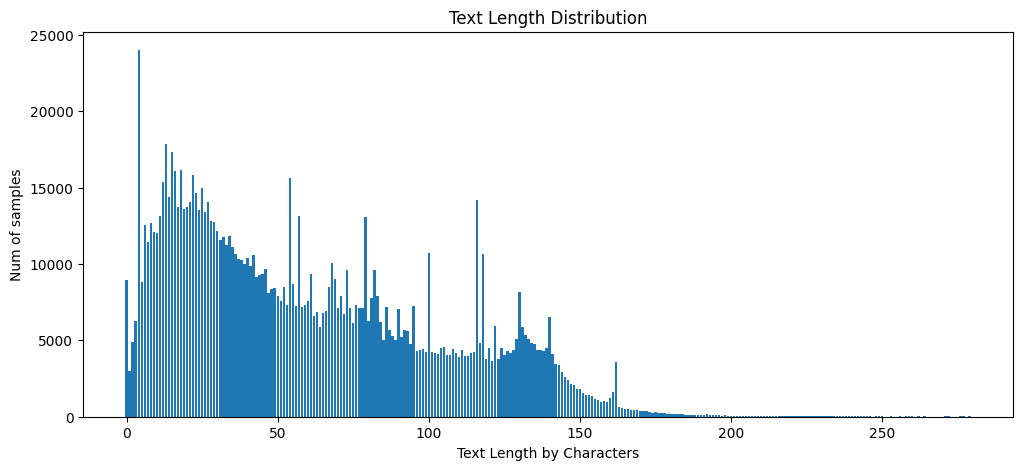

In [7]:
text_length = df['content'].astype(str).apply(process_text).apply(len).to_numpy()

fig = plt.figure(figsize=(12,5))
plt.hist(text_length, bins=range(0, text_length.max() + 1), align='left', rwidth=0.8)
plt.xlabel('Text Length by Characters')
plt.ylabel('Num of samples')
plt.title('Text Length Distribution')
plt.show()